binaryImageNames: ['./test_images/binary/test1.png', './test_images/binary/test2.png', './test_images/binary/test3.png', './test_images/binary/test4.png', './test_images/binary/test5.png', './test_images/binary/test6.png']
testImageNames: ['./test_images/transformed/test1.jpg', './test_images/transformed/test2.jpg', './test_images/transformed/test3.jpg', './test_images/transformed/test4.jpg', './test_images/transformed/test5.jpg', './test_images/transformed/test6.jpg']
binaryImageName:  ./test_images/binary/test1.png , binaryImage.shape: (720, 1280) , type: uint8
locateLaneMarkerIndex - startingInRow:  72 , startingInColumn: 128 , endingInRow: 576
locateLaneMarkerIndex - binaryImageName:  ./test_images/binary/test1.png , croppedBinaryImage.shape: (504, 1152) , type: uint8
locateLaneMarkerIndex - histogram.shape:  (1152,) , alignedHistogram.shape: (1280,) , type: uint64
locateLaneMarkerIndex - binaryImageName: ./test_images/binary/test1.png , leftx_base: 315 , rightx_base: 1083
binaryIm

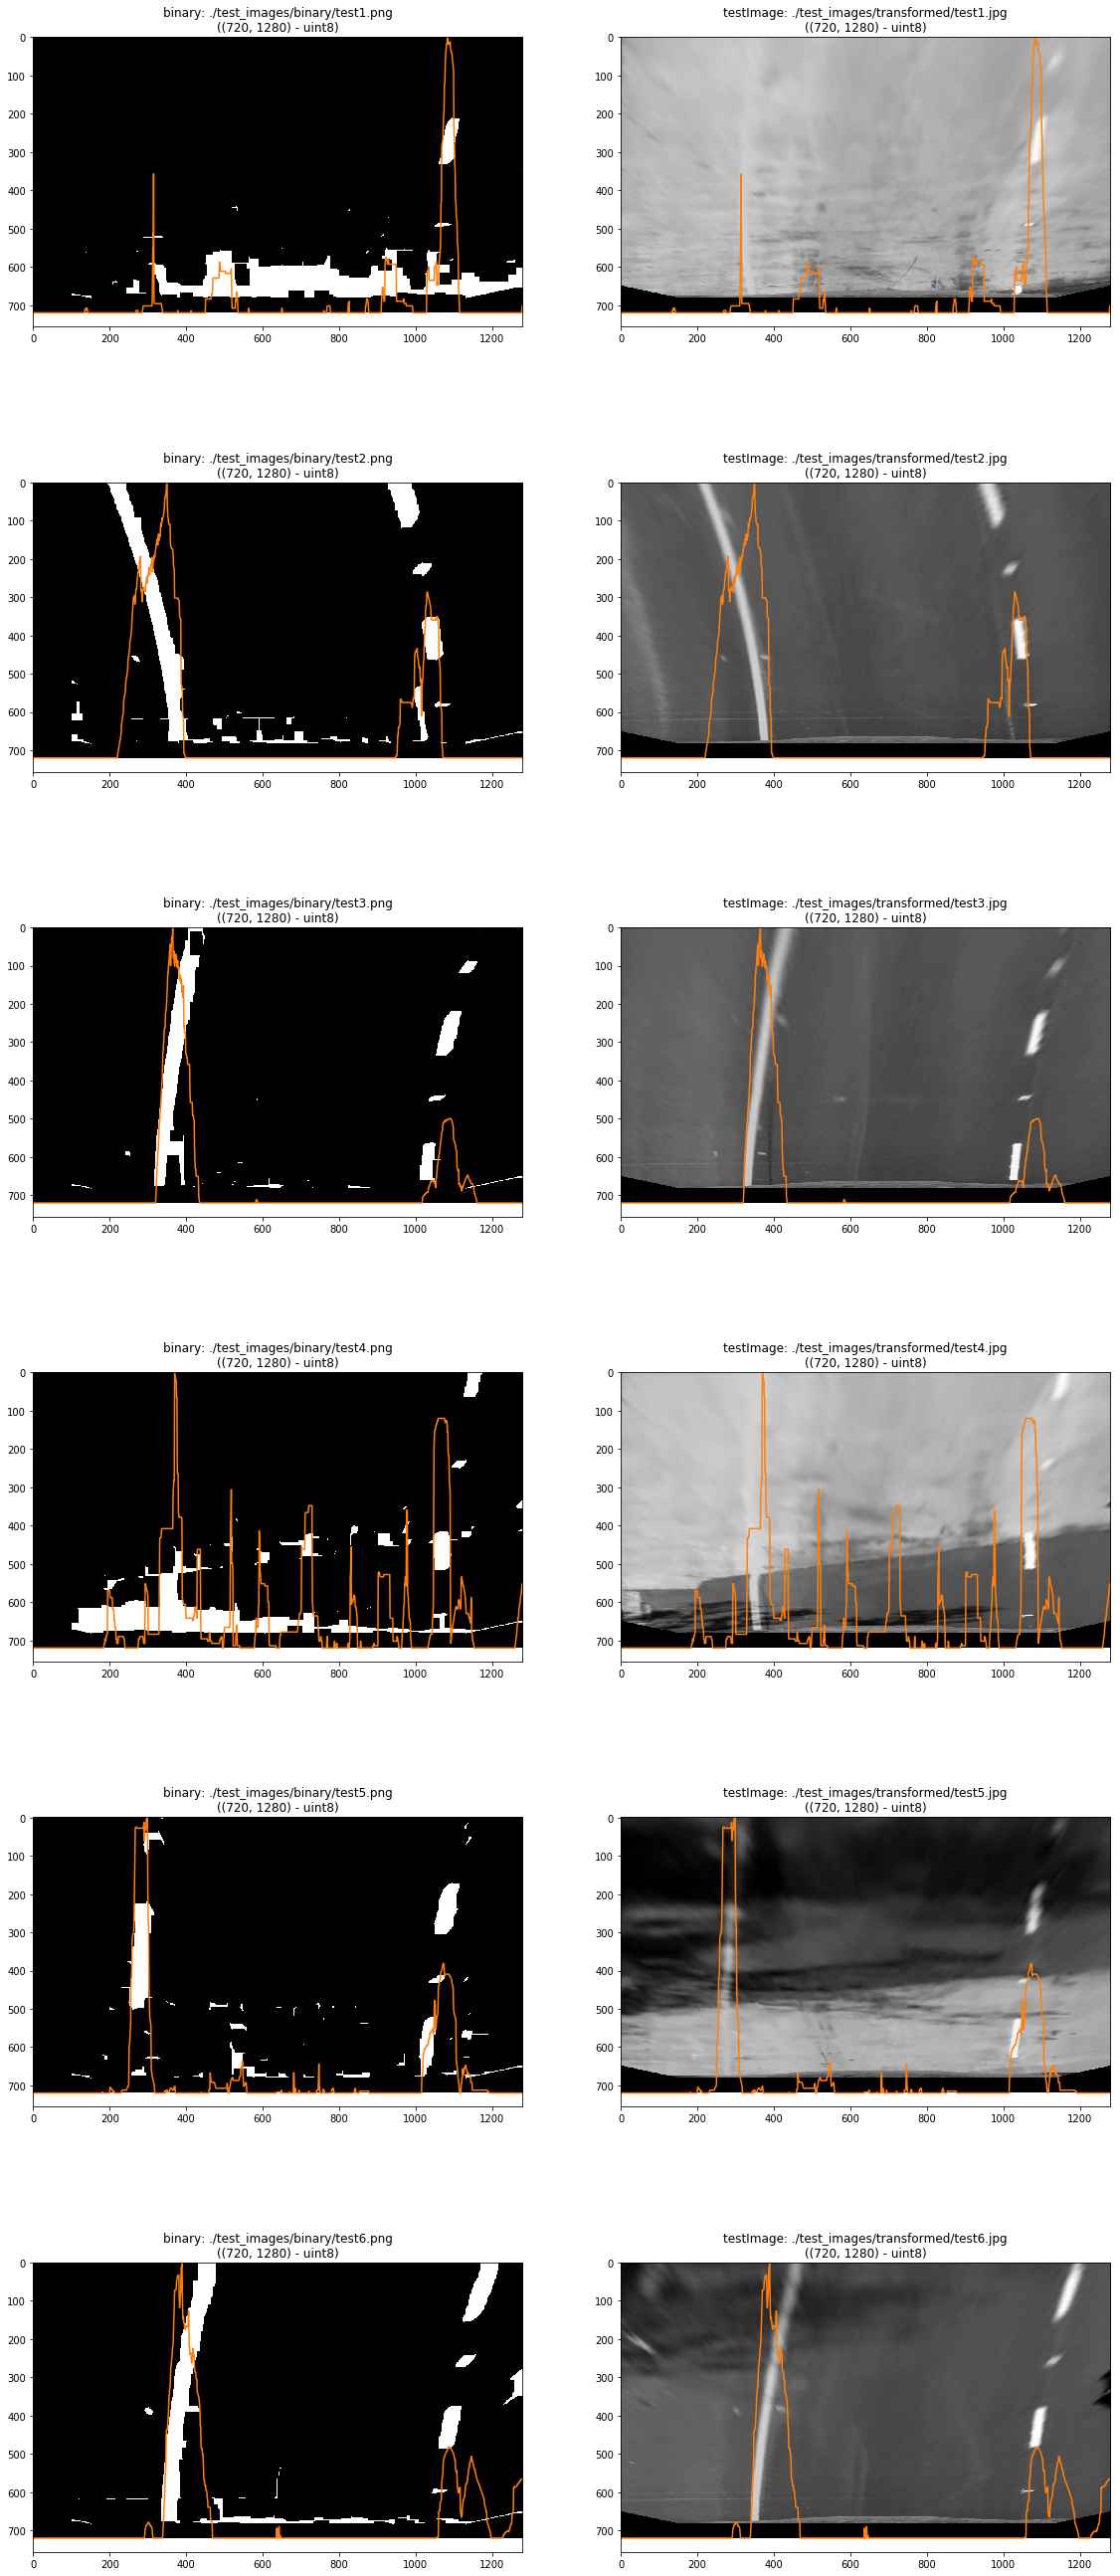

In [20]:
import glob
import numpy as np

TRIMSTARTINGROWS=(1./10.)
TRIMENDINGROWS=(1./5.)
TRIMSTARTINGCOLUMNS=(1./10.)

def locateLaneMarkerIndex(binaryImage):
    startingInRow=int(binaryImage.shape[0]*TRIMSTARTINGROWS)
    endingInRow=int(binaryImage.shape[0]-binaryImage.shape[0]*TRIMENDINGROWS)
    startingInColumn=int(binaryImage.shape[1]*TRIMSTARTINGCOLUMNS)
    print("locateLaneMarkerIndex - startingInRow: ",startingInRow, ", startingInColumn:", startingInColumn, ", endingInRow:", endingInRow)
    
    croppedBinaryImage=binaryImage[startingInRow:endingInRow,startingInColumn:]
    print("locateLaneMarkerIndex - binaryImageName: ",binaryImageName, ", croppedBinaryImage.shape:", croppedBinaryImage.shape, ", type:", croppedBinaryImage.dtype)
    #croppedBinaryImages[binaryImageName]=croppedBinaryImage
       
    histogram = np.sum(croppedBinaryImage, axis=0) # bucket size ???
    #histograms[binaryImageName]=histogram
    alignedHistogram = np.zeros(binaryImage.shape[1], dtype=histogram.dtype)
    alignedHistogram[startingInColumn:startingInColumn+histogram.shape[0]]=histogram
    print("locateLaneMarkerIndex - histogram.shape: ",histogram.shape, ", alignedHistogram.shape:", alignedHistogram.shape, ", type:", alignedHistogram.dtype)
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    #histogram=histograms[binaryImageName]
    midpoint = np.int(alignedHistogram.shape[0]/2)
    leftx_base = np.argmax(alignedHistogram[:midpoint])
    rightx_base = np.argmax(alignedHistogram[midpoint:]) + midpoint
    print("locateLaneMarkerIndex - binaryImageName:", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    return [leftx_base, rightx_base], alignedHistogram

def invertHistogram(histogram, maxValue):
    maxValueInHistogram=np.max(histogram)
    scale=float(maxValue)/float(maxValueInHistogram)
    invertedHistogram=np.zeros(histogram.shape[0], dtype=histogram.dtype)
    invertedHistogram=maxValue-histogram*scale
    return invertedHistogram

binaryImageNames=glob.glob("./test_images/binary/test*")
binaryImageNames.sort()
#binaryImageNames= [
#    './test_images/binary/test1.png',
#    './test_images/binary/test2.png',
#    './test_images/binary/test3.png',
#    './test_images/binary/test4.png',
#    './test_images/binary/test5.png',
#    './test_images/binary/test6.png'
#]
print("binaryImageNames:", binaryImageNames)
testImageNames=glob.glob("./test_images/transformed/test*")
testImageNames.sort()
#testImageNames= [
#    './test_images/transformed/test1.jpg',
#   './test_images/transformed/test2.jpg',
#    './test_images/transformed/test3.jpg',
#    './test_images/transformed/test4.jpg',
#    './test_images/transformed/test5.jpg',
#    './test_images/transformed/test6.jpg'
#]
print("testImageNames:", testImageNames)

binaryImageColumnCount=3 # original, transformed
totalImageRows=len(binaryImageNames) # 1 row per image

#import matplotlib.image as mpimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
showBinaryImages = plt.figure(figsize = (binaryImageColumnCount*10,totalImageRows*8))

binaryImages={}
histograms={}

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, binaryImageColumnCount*len(binaryImageNames), binaryImageColumnCount)):
    binaryImage=cv2.imread(binaryImageName, flags=0) # flags=0 is grayscale
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    binaryImages[binaryImageName]=binaryImage

    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+2)
    p.set_title("binary: "+binaryImageName+"\n("+str(binaryImage.shape)+" - "+str(binaryImage.dtype)+")")
    p.imshow(binaryImage, cmap='gray')

    [leftx_base, rightx_base], histogram=locateLaneMarkerIndex(binaryImage)
    print("binaryImageName: ",binaryImageName, ", histogram.shape:", histogram.shape, ", histogram[0]:", histogram[0])
    print("leftx_base:", leftx_base, ", histogram[leftx_base]", histogram[leftx_base], ", rightx_base:", rightx_base, ", histogram[rightx_base]:",histogram[rightx_base])
    invertedHistogram=invertHistogram(histogram, binaryImage.shape[0])
    p.plot(invertedHistogram, color='C1')
    
    testImage=cv2.imread(testImageName, flags=0) # flags=0 is grayscale
    #croppedTestImage=testImage[startingInRow:,:]
    #print("locateLaneMarkerIndex - testImageName: ",testImageName, ", croppedTestImage.shape:", croppedTestImage.shape, ", type:", croppedTestImage.dtype)
    #croppedTestImages[testImageName]=croppedTestImage
    p=showBinaryImages.add_subplot(totalImageRows, binaryImageColumnCount, binaryImageIndex+1)
    p.set_title("testImage: "+testImageName+"\n("+str(testImage.shape)+" - "+str(testImage.dtype)+")")
    p.imshow(testImage, cmap='gray')
    p.plot(invertedHistogram, color='C1')
 
    

In [ ]:
import matplotlib.image as mpimage

laneVisualizationColumnCount=3 # original, transformed
totalLaneVisualizationRows=len(binaryImageNames) # 1 row per image

def combineImages(img, initial_img, α=0.8, λ=0.):
    return cv2.addWeighted(initial_img, α, img, 1.-α, λ)

def initializeSlidingWindows(croppedBinaryImage):
    # Identify the x and y positions of all nonzero pixels in the image
    white = croppedBinaryImage.nonzero()
    whiteY = np.array(white[0])
    whiteX = np.array(white[1])
    print("total pixels:", croppedBinaryImage.shape[0]*croppedBinaryImage.shape[1], ", whiteX:", len(whiteX), ", whiteY:", len(whiteY))

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(croppedBinaryImage.shape[0]/nwindows)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print("binaryImageName:", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    # Identify the x and y positions of all nonzero pixels in the image
    white = croppedBinaryImage.nonzero()
    whiteY = np.array(white[0])
    whiteX = np.array(white[1])
    print("total pixels:", croppedBinaryImage.shape[0]*croppedBinaryImage.shape[1], ", whiteX:", len(whiteX), ", whiteY:", len(whiteY))

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(croppedBinaryImage.shape[0]/nwindows)
    print("nwindows: ",nwindows, ", window_height:", window_height)

    print("binaryImageName: ",binaryImageName, ", croppedBinaryImage.shape:", croppedBinaryImage.shape, ", type:", croppedBinaryImage.dtype)
    visualizationImage = np.dstack((croppedBinaryImage, croppedBinaryImage, croppedBinaryImage))*255
    #visualizationImage = croppedTestImages[testImageName]
    print("binaryImageName: ",binaryImageName, ", visualizationImage.shape:", visualizationImage.shape, ", type:", visualizationImage.dtype)

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = croppedBinaryImage.shape[0] - (window+1)*window_height
        win_y_high = croppedBinaryImage.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(visualizationImage,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(visualizationImage,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        print("window: ",window, ", window.shape: (",
              win_xleft_low,",",win_xleft_high,"),(",
              win_xright_low,",", win_xright_high, ") x (",
              win_y_low, ",", win_y_high, ")")

        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((whiteY >= win_y_low) & (whiteY < win_y_high)
                          & (whiteX >= win_xleft_low) & (whiteX < win_xleft_high)).nonzero()[0]
        good_right_inds = ((whiteY >= win_y_low) & (whiteY < win_y_high) & (whiteX >= win_xright_low) & (whiteX < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(whiteX[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(whiteX[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = whiteX[left_lane_inds]
    lefty = whiteY[left_lane_inds] 
    rightx = whiteX[right_lane_inds]
    righty = whiteY[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, croppedBinaryImage.shape[0]-1, croppedBinaryImage.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    visualizationImage[whiteY[left_lane_inds], whiteX[left_lane_inds]] = [255, 0, 0]
    visualizationImage[whiteY[right_lane_inds], whiteX[right_lane_inds]] = [0, 0, 255]
    return [left_fitx, right_fitx], visualizationImage
    

%matplotlib inline
showLaneVisualization= plt.figure(figsize = (laneVisualizationColumnCount*10,totalLaneVisualizationRows*8))

# cropping 100 pixels off the left and off the top
TRIMLEFT=0
TRIMTOP=100

for binaryImageName, testImageName, binaryImageIndex in zip(binaryImageNames, testImageNames, range(0, laneVisualizationColumnCount*len(binaryImageNames), laneVisualizationColumnCount)):

    testImage=cv2.imread(testImageName) # bgr image
    testImage=cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB);
    print("testImage.shape:", testImage.shape, ", type:", testImage.dtype)
   
    
    binaryImage=binaryImages[binaryImageName] # 0/1
    print("binaryImageName: ",binaryImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)
    print("binaryImage counts:", np.unique(binaryImage, return_counts=True), ", shape:",binaryImage.shape)
    overlayImage=np.dstack((np.zeros_like(binaryImage), binaryImage, np.zeros_like(binaryImage)))*255 # rgb, with green only
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("overlayImage ("+str(overlayImage.shape[0])+"x"+str(overlayImage.shape[1])+")")
    p.imshow(overlayImage)
    combinedImage=combineImages(overlayImage, testImage, α=.8)
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+1)
    p.set_title("combinedImage ("+str(combinedImage.shape[0])+"x"+str(combinedImage.shape[1])+")")
    p.imshow(combinedImage)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    histogram=histograms[binaryImageName]
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print("binaryImageName:(", binaryImageIndex, ") ", binaryImageName, ", leftx_base:", leftx_base, ", rightx_base:", rightx_base)
    
    
    croppedBinaryImage=croppedBinaryImages[binaryImageName]
    print("binaryImageName: ",binaryImageName, ", croppedBinaryImage.shape:", croppedBinaryImage.shape, ", type:", croppedBinaryImage.dtype)
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+2)
    p.set_title("binary: "+binaryImageName+"\n("+str(croppedBinaryImage.shape)+" - "+str(croppedBinaryImage.dtype)+")")
    p.imshow(croppedBinaryImage, cmap='gray')
    
    [left_fitx, right_fitx], visualizationImage = initializeSlidingWindows(croppedBinaryImage)
    
    p=showLaneVisualization.add_subplot(totalLaneVisualizationRows, laneVisualizationColumnCount, binaryImageIndex+3)
    p.set_title("visualization: "+binaryImageName+"\n("+str(croppedBinaryImage.shape)+" - "+str(croppedBinaryImage.dtype)+")")
    p.imshow(visualizationImage)
    
    p.plot(left_fitx, ploty, color='yellow')
    p.plot(right_fitx, ploty, color='yellow')
    p.set_xlim([0, croppedBinaryImage.shape[1]])
    p.set_ylim([croppedBinaryImage.shape[0], 0])


In [ ]:
import glob
import numpy as np

videoImages=glob.glob("./test_images/video_frames/frame*")
videoImages.sort()
videoImages= [
    './test_images/video_frames/frame0001.jpg',
    './test_images/video_frames/frame0002.jpg',
#    './test_images/video_frames/frame0003.jpg',
#    './test_images/video_frames/frame0004.jpg',
#    './test_images/video_frames/frame0005.jpg',
#    './test_images/video_frames/frame0006.jpg',
#    './test_images/video_frames/frame0007.jpg',
#    './test_images/video_frames/frame0008.jpg',
#    './test_images/video_frames/frame0009.jpg',
#    './test_images/video_frames/frame0010.jpg'
]
print("videoImages:", videoImages)

def process_image(rgbImage):
    return rgbImage

# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]